# Evaluate if one can use the LLOD cloud to translate a specific resource

Use case: you are a linguist and you have a specific dataset that you would like to translate in one or several languages. You consider using some resources available in the cloud for this task, but you don't know which resource you should turn to nor in which extend this resource will be fit for your specific task.

Here, we show you how you can evaluate the "naive" performance of a set of cloud resources in term of coverage and perplexity.

## Input Resource Modeling

As a first attempt, we consider that the resource is reduced to a list of language strings.



## Translation Strategies

Several strategies may be used and evaluated. Among such strategies, we could try:

- querying vartrans links from DBnary or another resources
- querying dbnary:Translation objects from DBnary
- pivoting through one or several language translations in DBnary
- querying DBpedia
- querying WikiData
- ...

## Evaluation of the results

From each of these strategies, we will gather coverage or perplexity.

- Coverage: how many entries from the source set are indeed known somehow in the cloud resource
- Perplexity: how many translation candidates can be gathered from the resource


In [1]:
%%capture 
!pip3 install rdflib sparqlwrapper pydotplus graphviz tabulate

In [2]:
to_translate = ["paradiegesis", "prodiegesis", "epidiegesis", "metallage", "tapinosis", "meiosis", "antiphrasis", "paralipsis", 
"anesis", "apocope", "abecedarian", "aphaeresis", "abominatio", "apodioxis", "bdelygmia", "abuse"]

In [3]:
%%bash 
git clone https://github.com/serasset/llod-cloud-evaluator.git

Cloning into 'llod-cloud-evaluator'...


In [4]:
%%bash
cp -r llod-cloud-evaluator/src/*.py .

In [5]:
from llod_translation_strategies import DirectDBnaryTranslationStrategy, CrossDBnaryTranslationStrategy, DBpediaTranslationStrategy, WikiDataTranslationStrategy

strategies = [DirectDBnaryTranslationStrategy(), CrossDBnaryTranslationStrategy(), DBpediaTranslationStrategy(), WikiDataTranslationStrategy()]


In [6]:
import pandas as pd
data = []

for word in to_translate:
  for strategy in strategies:
    results = [word, strategy.name]
    num_entries = strategy.translate(word, "en").shape[0]
    results.append(num_entries)
    data.append(results)

col_names = ["Given Word", "Strategy", "Number of Entries"]
table = pd.DataFrame(data, columns = col_names)
table


,Given Word,Strategy,Number of Entries
0,paradiegesis,Direct DBnary,0
1,paradiegesis,Cross Translation DBnary,0
2,paradiegesis,General Shared Label From Ontology: DBpedia,0
3,paradiegesis,General Shared Label From Ontology: WikiData,0
4,prodiegesis,Direct DBnary,0
...,...,...,...
59,bdelygmia,General Shared Label From Ontology: WikiData,0
60,abuse,Direct DBnary,369
61,abuse,Cross Translation DBnary,1556
62,abuse,General Shared Label From Ontology: DBpedia,14


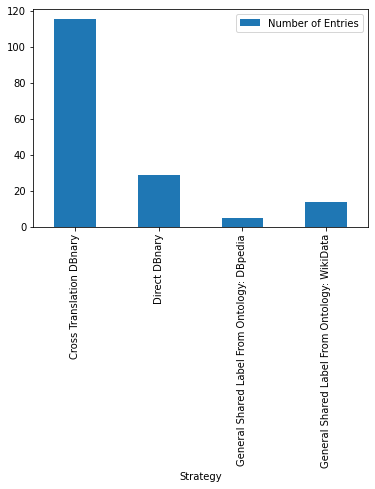

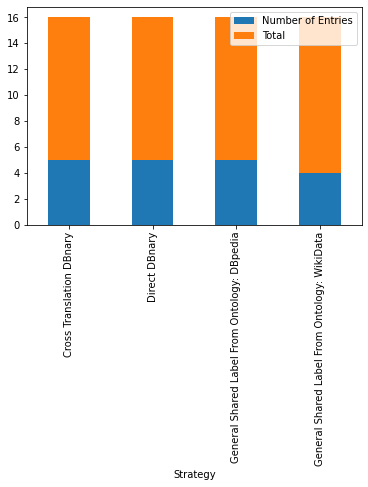

In [7]:
mean = table.groupby(['Strategy']).mean()
mean.plot.bar()
coverage = table.loc[table['Number of Entries'] > 1].groupby(['Strategy']).count().drop(columns=["Given Word"])
#coverage["Total Words"] = coverage.(len(to_translate) - ['Strategy'])
coverage['Total'] = len(to_translate)-coverage["Number of Entries"]
coverage.plot.bar(stacked=True)
